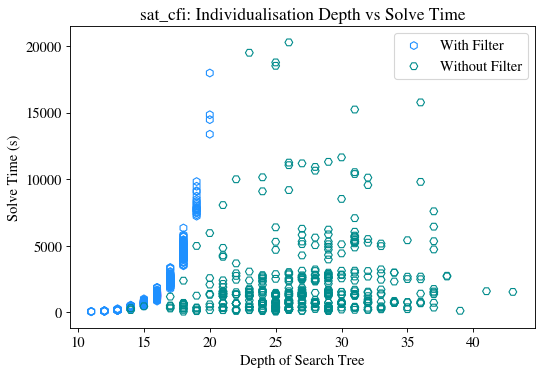

In [3]:
# awk '/grpsize/ {print "maxlev: " substr($NF, 8) } /seconds/ {print "time: "$4}' */nauty_times.txt

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 7
matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['figure.dpi'] = 80

f1 = open("depth_with_filter.txt")
f2 = open("depth_without_filter.txt")
lines1 = f1.read().split("\n")[:-1]
lines2 = f2.read().split("\n")[:-1]

def extract_values(lines):
    depths = list(map(lambda s: int(s.replace("maxlev: ", "")), lines[0::2]))
    times = list(map(lambda s: float(s.replace("time: ", "")), lines[1::2]))
    
    return (depths, times)
    
depths1, times1 = extract_values(lines1)
depths2, times2 = extract_values(lines2)

fig = plt.figure(num=None, figsize=(7.5, 5))
ax = fig.add_subplot(111)

ax.scatter(depths1, times1, marker="h", facecolors='None', edgecolors="dodgerblue")
ax.scatter(depths2, times2, marker="H", facecolors='None', edgecolors="darkcyan")
ax.set_title("sat_cfi: Individualisation Depth vs Solve Time")
ax.set_xlabel("Depth of Search Tree")
ax.set_ylabel("Solve Time (s)")

ax.legend(["With Filter", "Without Filter"])
plt.show()

fig.savefig("depth_vs_time.pdf", bbox_inches='tight')